<a href="https://colab.research.google.com/github/PYnomad/Computer-Vision---Cellula/blob/main/Teeth_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
!unzip /DataSet.zip

Streaming output truncated to the last 5000 lines.
  inflating: Teeth_Dataset/Validation/CoS/b_111_0_6094.jpg  
  inflating: Teeth_Dataset/Testing/CoS/b_150_0_2905.jpg  
  inflating: Teeth_Dataset/Testing/OT/ot_1241_0_1157.jpg  
  inflating: Teeth_Dataset/Validation/CoS/b_95 - Copy_0_6372.jpg  
  inflating: Teeth_Dataset/Testing/CaS/a_152_0_7749.jpg  
  inflating: Teeth_Dataset/Testing/CaS/a_126_0_9339.jpg  
  inflating: Teeth_Dataset/Testing/outputs/a_110_0_9820.jpg  
  inflating: Teeth_Dataset/Testing/outputs/a_141_0_7620.jpg  
  inflating: Teeth_Dataset/Validation/CoS/b_132_0_2266.jpg  
  inflating: Teeth_Dataset/Testing/outputs/a_99_0_9803.jpg  
  inflating: Teeth_Dataset/Testing/OT/ot_1223_0_6812.jpg  
  inflating: Teeth_Dataset/Testing/OT/ot_1223_0_6082.jpg  
  inflating: Teeth_Dataset/Testing/output/a_145_0_219.jpg  
  inflating: Teeth_Dataset/Testing/output/a_119_0_1965.jpg  
  inflating: Teeth_Dataset/Testing/CoS/b_112_0_1990.jpg  
  inflating: Teeth_Dataset/Testing/output/a_1

# **# Define dataset paths**

In [ ]:
dataset_path = "/content/Teeth_Dataset"
train_path = os.path.join(dataset_path, "Training")
val_path = os.path.join(dataset_path, "Validation")
test_path = os.path.join(dataset_path, "Testing")

# **# Image dimensions and batch size**


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# **# Data augmentation and preprocessing**


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# **# Load training and validation datasets**


In [ ]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1028 images belonging to 7 classes.


# **# Function to visualize class distribution**


In [ ]:
def plot_class_distribution(generator, title):
    class_counts = generator.class_indices
    class_counts = {k: len(os.listdir(os.path.join(train_path, k))) for k in class_counts.keys()}

    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# **# Plot class distribution**


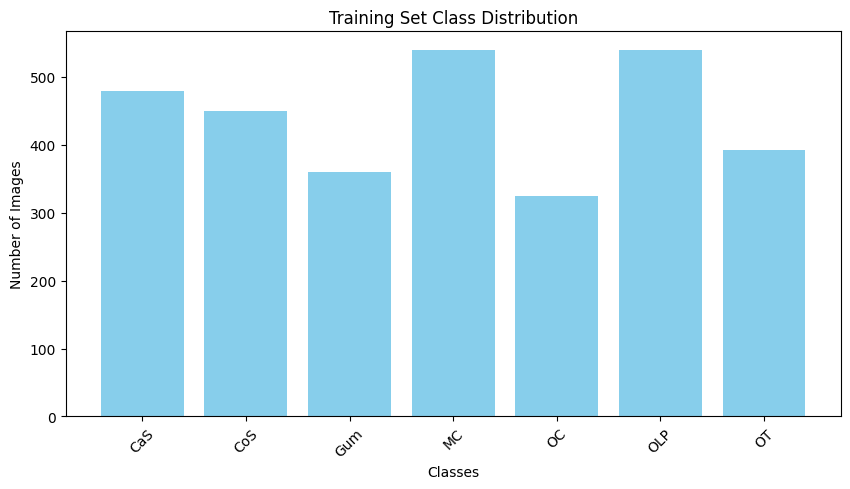

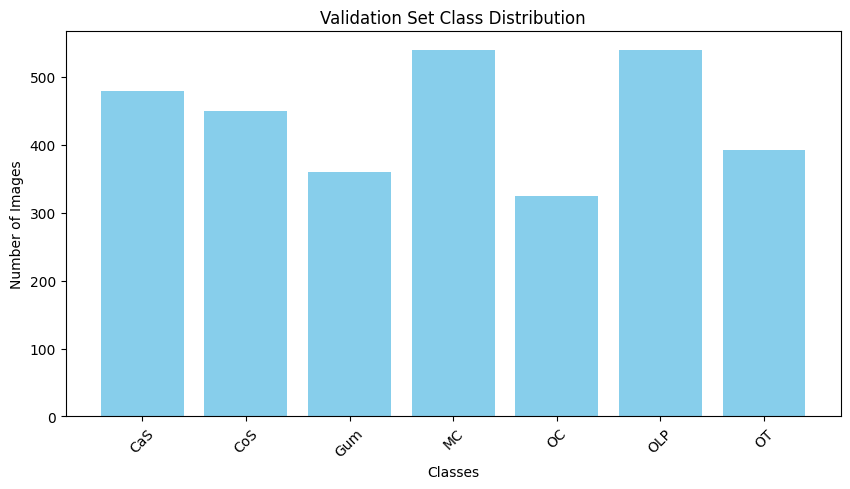

In [ ]:
plot_class_distribution(train_generator, "Training Set Class Distribution")
plot_class_distribution(val_generator, "Validation Set Class Distribution")

# **# Model architecture**


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile model**


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 458s 5s/step - accuracy: 0.1872 - loss: 2.1599 - val_accuracy: 0.2802 - val_loss: 1.8058
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.2414 - loss: 1.8387 - val_accuracy: 0.3327 - val_loss: 1.7392
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 402s 4s/step - accuracy: 0.2749 - loss: 1.7865 - val_accuracy: 0.3667 - val_loss: 1.6655
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.3191 - loss: 1.7213 - val_accuracy: 0.3570 - val_loss: 1.6207
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 401s 4s/step - accuracy: 0.3113 - loss: 1.7275 - val_accuracy: 0.3979 - val_loss: 1.5691
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 437s 4s/step - accuracy: 0.3828 - loss: 1.6416 - val_accuracy: 0.3988 - val_loss: 1.5369
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.3952 - loss: 1.5877 - val_accuracy: 0.3531 - val_loss: 1.6742
Epoch 8/10
74/97 ━━━━━━━━━━━━━━━━━━━━ 1:23 4s/step - accuracy: 0.3766 - loss: 1.6166

KeyboardInterrupt: 